# ESAME TRACCIA A MARZO 2024

Un macchinario riempie automaticamente delle confezioni alimentari il cui peso segue una distribuzione
 normale di media 220 g e deviazione standard 8 g.
 1. Qual e la probabilita che la confezione pesi pIu di 230 g?
 2. Qual e la probabilita che il peso della confezione sia compreso tra 210 g e 225 g?
 3. Le confezioni vengono imballate in scatole da 10 unita. Dopo aver calcolato la distribuzione del
 peso della scatola, calcolare la probabilit`a che il peso totale superi i 2250 g (si trascuri il peso
 della scatola)

In [1]:
# 1
from scipy.stats import norm
#norm.cdf(x,media,deviazione) -> ripartizione 
#norm.sf(x,media,deviazione)->sopravvivenza
#deviazione = np.sqrt(varianza) <-- IMPORTANTE


mu = 220
S = 8


#pesi più = usare sopravvivenza

p= norm.sf(230,mu,S)
print (p)



0.10564977366685535


In [2]:
#2

#sia compresa tra 210 e 225

p=norm.cdf(225,mu,S)-norm.cdf(210,mu,S)
print(p)


0.6283646972844441


In [3]:
# 3
import numpy as np



n=10
mu=220

peso_scatola=mu*n
sigma_tot= np.sqrt(n)*S


p=norm.sf(2250,peso_scatola,sigma_tot)
print(p)


0.024053413944259697


# ESERCIZIO 2

 Si considerino i seguenti dati, ottenuti sperimentalmente per determinare l’effetto del tempo in ore
 (x) a una particolare temperatura e il cambiamento della viscosit`a (y) di un olio.
 x 0.25 0.5 0.75 1 1.25 1.5 1.75 2 2.25 2.5
 y-1.42-1.39-1.55-1.89-2.43-3.15-4.05-5.15-6.43-7.89
 1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
 calcoli il coefficiente di determinazione.
 2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
 3. Si determinino i coefficienti per un modello di regressione lineare del tipo y = a0 +a1x+a2x2 e
 si calcoli nuovamente il coefficiente di determinazione. Si pu`o affermare che il secondo modello
 si adatta meglio ai dati? Giustificare la risposta.
 4. Si rappresentino i dati, la retta di regressione e il modello quadratico in uno stesso grafico.

In [4]:
import numpy as np
from scipy.stats import norm,t
import matplotlib.pyplot as plt
x = np.array([0.25, 0.5,  0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
y = np.array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43, -7.89])

display(x)
display(y)

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ])

array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43,
       -7.89])

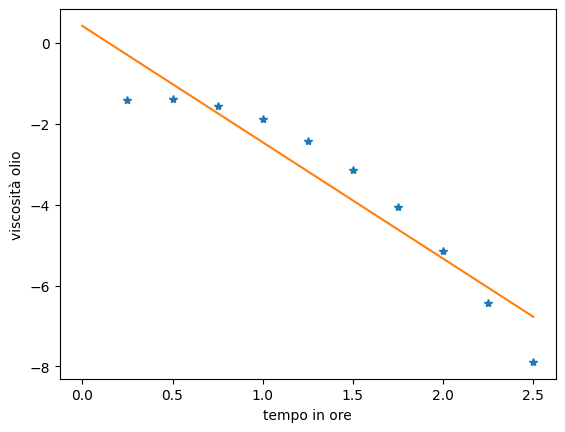

In [5]:
#passaggi retta di regressione

#step 1: trovare i coefficienti b0 e b1

n=x.size
x_mean=np.mean(x)
y_mean=np.mean(y)

dev_xy=np.sum(x*y - x_mean*y_mean)/n

dev_x=np.std(x)
sig_x2=np.sum((x**2)-(x_mean**2))/n


#TROVO B0
b0=y_mean -(dev_xy/sig_x2)*x_mean

#TROVO B1
b1=dev_xy/sig_x2

#TROVATO TUTTO ORA CERCO LA RETTA DEI MINIMI QUADRATI -> Y

xx=np.linspace(0,2.50,1000)

yy=b0+b1*xx

plt.plot(x,y,'*')
plt.plot(xx,yy)
plt.xlabel('tempo in ore')
plt.ylabel('viscosità olio')
plt.show()



In [6]:
#calcolo intervallo di confidenza al 95%

alpha= 0.05

y_hat=b0*b1*x
r=y-y_hat

s2=np.sum(r**2)/(n-2)
s= np.sqrt(s2)

T = t.ppf(1-alpha/2, n-2)

b0_l=b0-s*np.sqrt(1/n+x_mean**2/(n*sig_x2))*T
b0_r=b0+s*np.sqrt(1/n+x_mean**2/(n*sig_x2))*T

b1_l=b1-(s/np.sqrt(sig_x2)*np.sqrt(n))*T
b1_r=b1+(s/np.sqrt(sig_x2)*np.sqrt(n))*T

print(b0)
display(b0_l,b0_r)

display(b1)
display(b1_l,b1_r)

0.4219999999999975


-3.657891469057891

4.501891469057886

-2.87781818181818

-29.17918007380291

23.42354371016655

In [7]:
# calcolo coefficiente di determinazione
sig_y2=np.sum((y-y_mean)**2)/n
R2= (dev_xy)**2/(sig_x2*sig_y2)

display(R2)

0.9026209868993401

In [8]:
#il modello di regressione è adeguato


# COMPLETARE ESERCIZIO 2

# ESERCIZIO 3

Si effettua uno studio su quale sia la temperatura corporea limite per cui essa si possa considerare
 normale. Si estrae un campione di 25 soggetti riportando le seguenti misurazioni in °
 C.
 36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
 36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
 37.1, 37.1, 37.2, 37.2, 37.2.
 1. Si calcolino la media e la deviazione standard campionarie, e l’intervallo di confidenza per la
 media con livello di fiducia 0.01.
 2. Si testi l’ipotesi che la temperatura limite normale media sia di 37 °
 C. Si utilizzi α = 0.05.
 3. Calcolare il p-value del test.
 4. Quale sarebbe la dimensione campionaria richiesta per determinare una temperatura limite reale
 di 36.8 °C richiedendo una potenza del test del 90%?

In [9]:
#1
import numpy as np

X=np.array([ 36.6, 36.2, 36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,
             36.8, 36.8, 36.8, 36.9, 36.9, 36.9, 36.9, 37.0, 37.0, 37.1,
             37.1, 37.1, 37.2, 37.2, 37.2])


#media campionaria e deviazione standard

mu=np.mean(X)


#deviazione
S=np.std(X,ddof=1)


print(mu)
print(S)



36.816
0.27337398071750263


In [10]:
from scipy.stats import t

alpha=0.01
n=X.size

t=t.ppf(1-alpha/2,n-1)


Il=mu - S/np.sqrt(n)*t
Ir=mu + S/np.sqrt(n)*t


display(Il,Ir)

36.66307790275085

36.968922097249155

In [11]:
#2
from scipy.stats import t
#test di ipotesi per la media 

mu_0=37
alpha=0.05

T_0=mu-mu_0/S*np.sqrt(n)

t=t.ppf(1-alpha/2,n-1)


display(T_0)

display(t)

-639.9126320170099

2.0638985616280205

In [12]:
# non si rigetta l'ipotesi nulla a favore di quella alternativa perchè T_0 < t
# se fosse stato T_0 > t si rigettava
from scipy.stats import t
#calcolo p_value
p_value=1-t.cdf(T_0,n-1)

print(p_value)


1.0


In [13]:
# 4 
from scipy.stats import norm
mu_0=37
mu_a=36.8
S=np.std(X,ddof=1)
alpha = 0.05
beta = 0.1 # 1- beta(potenza)->90% (guarda errore del 2 tipo)

#calcolo phi-alpha e phi-beta
phi_alpha=norm.ppf(1-alpha/2)
phi_beta=norm.ppf(1-beta)

#differenza tra le medie
delta = mu_0-mu_a

#calcolo dimensione campionaria
n=(phi_alpha+phi_beta)**2*S**2/delta**2

display(n)







19.631368753124374